Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [5]:
import requests 
from IPython.display import JSON
import json
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [58]:
#Merging of business data from foursquare and yelp and then selection of food outlets specifically for 
#further analysis. Food square has 790 business outlets while yelp has 2000 food outlets.

df_fsquare = pd.read_csv('fsquare_POIs_for_100_BikeStns.csv')

df_fsquare_food = df_fsquare[df_fsquare['poi_bsns_category'] == 'Dining and Drinking']

df_yelp = pd.read_csv('yelp_POIs_for_100_BikeStns.csv')

df_merge_fs_yelp = pd.concat([df_fsquare_food, df_yelp], ignore_index=True, sort=False)

df_merge_fs_yelp = df_merge_fs_yelp.sort_values(by=['bike_station_id', 'poi_distance_from_bike_stn'])

df_merge_fs_yelp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2533 entries, 2409 to 2121
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   poi_id                      2533 non-null   object 
 1   poi_name                    2533 non-null   object 
 2   poi_distance_from_bike_stn  2533 non-null   int64  
 3   poi_latitude                2533 non-null   float64
 4   poi_longitude               2533 non-null   float64
 5   bike_station_id             2533 non-null   object 
 6   poi_bsns_category           2533 non-null   object 
 7   review_count                2000 non-null   float64
 8   rating                      2000 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 197.9+ KB


In [59]:
df_bike_stns = pd.read_csv('london_city_bikes_stns.csv')

df_bike_stns.rename(columns = {'station_id':'bike_station_id'}, inplace = True) 

df_join = pd.merge(df_bike_stns, df_merge_fs_yelp, on='bike_station_id')

df_join.to_csv("merged_poi_info_for_100_BikeStns.csv", index=False)

df_join.info()

#After merging and joining of yelp and foursquare data, total of 2553 food outlets selected out of total 2900 
#business outlets. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2533 entries, 0 to 2532
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   network_city                2533 non-null   object 
 1   network_name                2533 non-null   object 
 2   station_name                2533 non-null   object 
 3   bike_station_id             2533 non-null   object 
 4   station_latitude            2533 non-null   float64
 5   station_longitude           2533 non-null   float64
 6   empty_slots                 2533 non-null   int64  
 7   free_bikes                  2533 non-null   int64  
 8   total_bikes                 2533 non-null   int64  
 9   poi_id                      2533 non-null   object 
 10  poi_name                    2533 non-null   object 
 11  poi_distance_from_bike_stn  2533 non-null   int64  
 12  poi_latitude                2533 non-null   float64
 13  poi_longitude               2533 

In [60]:
#validation of sample record to ensure that merged data reflects original transactional data
#from yelp and foursquare.

df_join[df_join['bike_station_id'] == 'f8dfc16e9f34e5c21bfc24efe8831549']

,network_city,network_name,station_name,bike_station_id,station_latitude,station_longitude,empty_slots,free_bikes,total_bikes,poi_id,poi_name,poi_distance_from_bike_stn,poi_latitude,poi_longitude,poi_bsns_category,review_count,rating
2021,London,santander-cycles,"000960 - Hop Exchange, The Borough",f8dfc16e9f34e5c21bfc24efe8831549,51.504628,-0.091774,10,46,56,VSrnYJMirUi6ZQna_qtwMw,The Breakfast Club,26,51.504555,-0.091689,Dining and Drinking,101.0,4.0
2022,London,santander-cycles,"000960 - Hop Exchange, The Borough",f8dfc16e9f34e5c21bfc24efe8831549,51.504628,-0.091774,10,46,56,5946b8a617556232c3759fe9,Honest Burgers Borough,49,51.504574,-0.090981,Dining and Drinking,NaN,NaN
2023,London,santander-cycles,"000960 - Hop Exchange, The Borough",f8dfc16e9f34e5c21bfc24efe8831549,51.504628,-0.091774,10,46,56,5b4736f5835c9a002c447b88,Casa do Frango,79,51.504928,-0.092688,Dining and Drinking,NaN,NaN
2024,London,santander-cycles,"000960 - Hop Exchange, The Borough",f8dfc16e9f34e5c21bfc24efe8831549,51.504628,-0.091774,10,46,56,4ae6ff5cf964a520e5a721e3,Kappacasein Dairy,83,51.505023,-0.090616,Dining and Drinking,NaN,NaN
2025,London,santander-cycles,"000960 - Hop Exchange, The Borough",f8dfc16e9f34e5c21bfc24efe8831549,51.504628,-0.091774,10,46,56,4b994ea1f964a520c57135e3,Applebee's Fish,85,51.505062,-0.090958,Dining and Drinking,NaN,NaN
2026,London,santander-cycles,"000960 - Hop Exchange, The Borough",f8dfc16e9f34e5c21bfc24efe8831549,51.504628,-0.091774,10,46,56,4CGgn2MmN5Z7B6GAlMAcxQ,Mango Indian,90,51.504962,-0.092963,Dining and Drinking,144.0,4.5
2027,London,santander-cycles,"000960 - Hop Exchange, The Borough",f8dfc16e9f34e5c21bfc24efe8831549,51.504628,-0.091774,10,46,56,bibItX92d7LSCVThLeXb8Q,Tapas Brindisa,100,51.505063,-0.090526,Dining and Drinking,141.0,4.0
2028,London,santander-cycles,"000960 - Hop Exchange, The Borough",f8dfc16e9f34e5c21bfc24efe8831549,51.504628,-0.091774,10,46,56,IWl1Y0eQOZSnYeIDw94svg,Monmouth Coffee,103,51.505538,-0.091462,Dining and Drinking,317.0,4.5
2029,London,santander-cycles,"000960 - Hop Exchange, The Borough",f8dfc16e9f34e5c21bfc24efe8831549,51.504628,-0.091774,10,46,56,34F8sZE1xq-Ki-zSPbHrGg,Wright Brothers,112,51.505629,-0.091537,Dining and Drinking,94.0,4.0
2030,London,santander-cycles,"000960 - Hop Exchange, The Borough",f8dfc16e9f34e5c21bfc24efe8831549,51.504628,-0.091774,10,46,56,VFt0kawsBqqNIh9UJYS4tg,The George Inn,123,51.504003,-0.090295,Dining and Drinking,145.0,4.0


In [90]:
#aggregations of merged data over each bike station to get the average distances of food
#outlets, number of reviews, ratings and number of bikes.

df_agg = df_join.groupby(['bike_station_id']).aggregate(
    {'station_name': 'first',
     'poi_distance_from_bike_stn': 'median',
     'free_bikes': 'mean',
     'review_count': 'mean',
     'rating': 'mean'})

#validation of sample record to ensure that the aggregated data reflects the transactional merged data.
df_agg[df_agg['station_name'] == '000960 - Hop Exchange, The Borough']

,station_name,poi_distance_from_bike_stn,free_bikes,review_count,rating
bike_station_id,,,,,
f8dfc16e9f34e5c21bfc24efe8831549,"000960 - Hop Exchange, The Borough",156.5,46.0,187.05,4.2


In [91]:
df_agg.to_csv("aggregated_poi_info_for_100_BikeStns.csv", index=False)

df_agg.info()

#total of 100 records created for 100 bike stations with agregations on avergae food outlet distance, number of
#reviews, ratings and number of bikes for each bike station.

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0191ad8ece6d587cff8369b58327aacb to f8dfc16e9f34e5c21bfc24efe8831549
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   station_name                100 non-null    object 
 1   poi_distance_from_bike_stn  100 non-null    float64
 2   free_bikes                  100 non-null    float64
 3   review_count                100 non-null    float64
 4   rating                      100 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.7+ KB


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [87]:
# import seaborn
import seaborn as sns

# import matplotlib
import matplotlib.pyplot as plt

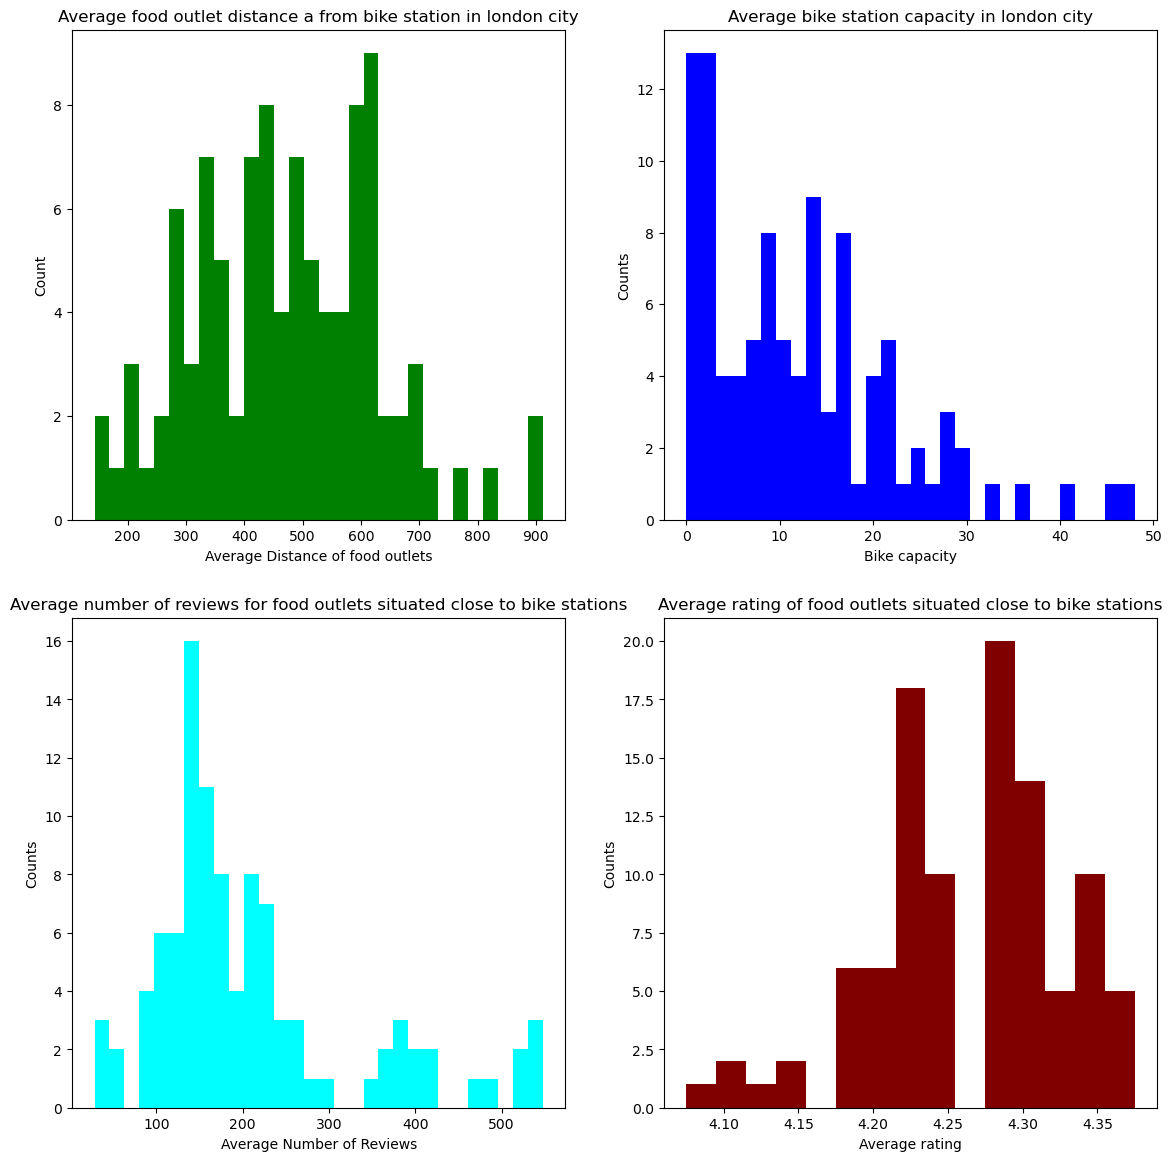

In [102]:
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

# Plot 0
axes[0][0].hist(df_agg['poi_distance_from_bike_stn'],bins=30, color='green')
axes[0][0].set_title('Average food outlet distance a from bike station in london city')
axes[0][0].set_xlabel('Average Distance of food outlets')
axes[0][0].set_ylabel('Count')

# Plot 1
axes[0][1].hist(df_agg['free_bikes'], bins=30, color='blue')
axes[0][1].set_title('Average bike station capacity in london city')
axes[0][1].set_xlabel('Bike capacity')
axes[0][1].set_ylabel('Counts')

# Plot 2
axes[1][0].hist(df_agg['review_count'], bins=30, color='cyan')
axes[1][0].set_title('Average number of reviews for food outlets situated close to bike stations')
axes[1][0].set_xlabel('Average Number of Reviews')
axes[1][0].set_ylabel('Counts')

# Plot 3
axes[1][1].hist(df_agg['rating'], bins=15, color='maroon')
axes[1][1].set_title('Average rating of food outlets situated close to bike stations')
axes[1][1].set_xlabel('Average rating')
axes[1][1].set_ylabel('Counts')

plt.show()

#Majority of graphs doesn't seem to display a normal distribution. 
#E.g. most bike stations seem to operate at lower capacity than on mean capacity of all bike stations. It may be 
#inferred that majority of areas probably don't need higher capacity owing to limited demand. Average distance 
#of food outlets is closer to normal distribution as this data reflects overtime growth of food outlets in an 
#area. Average number of reviews and ratings were expected to align with normal distribution but haven't been 
#found to exhibit normal distribution pattern below. This requires more investigation and indenpendent data.

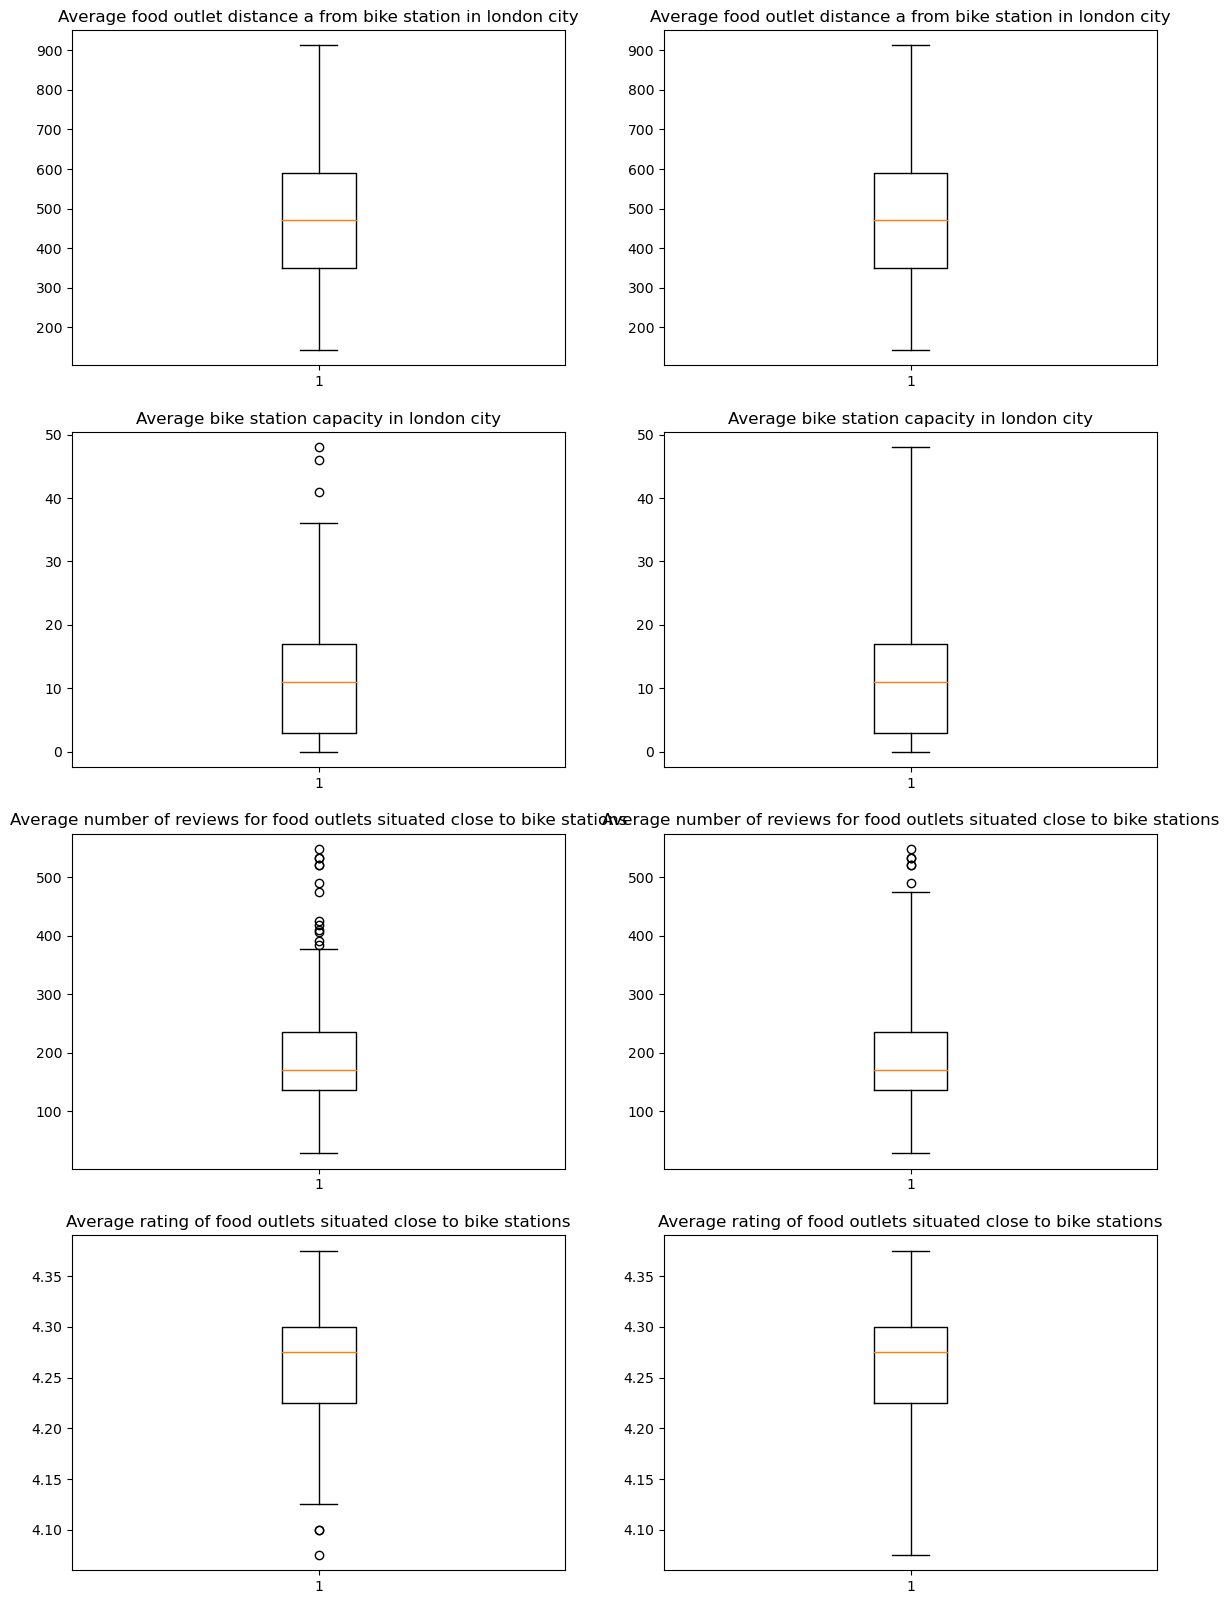

In [109]:
fig, axes = plt.subplots(4, 2, figsize=(14, 20))

axes[0][0].boxplot(df_agg['poi_distance_from_bike_stn'])
axes[0][0].set_title('Average food outlet distance a from bike station in london city')
axes[0][1].boxplot(df_agg['poi_distance_from_bike_stn'], whis=2.5)
axes[0][1].set_title('Average food outlet distance a from bike station in london city')

axes[1][0].boxplot(df_agg['free_bikes'])
axes[1][0].set_title('Average bike station capacity in london city')
axes[1][1].boxplot(df_agg['free_bikes'], whis=2.5)
axes[1][1].set_title('Average bike station capacity in london city')

axes[2][0].boxplot(df_agg['review_count'])
axes[2][0].set_title('Average number of reviews for food outlets situated close to bike stations')
axes[2][1].boxplot(df_agg['review_count'], whis=2.5)
axes[2][1].set_title('Average number of reviews for food outlets situated close to bike stations')

axes[3][0].boxplot(df_agg['rating'])
axes[3][0].set_title('Average rating of food outlets situated close to bike stations')
axes[3][1].boxplot(df_agg['rating'], whis=2.5)
axes[3][1].set_title('Average rating of food outlets situated close to bike stations')

plt.show()

#The data doesn't seem to display unusual outliers. E.g. It is possible that some
#bike stations have higher capacity owing to being situated close to train station, shopping or
#tourist areas. Also, some bike stations may be situated in areas hosting popular food outlets which are more 
#frequented, leading to higher number of reviews for food outlets close to certain bike stations.

In [111]:
df_agg.corr()

#there is weak correlation between average distance of bike stations from food outlets and 
#food outlets reviews and ratings. Similarly, there is weak correlation between bike station capacity and
#food outlets reviews and ratings. There is however a moderate correlations between 
#number of food outlet reviews and overall food outlet ratings of food outlets.

,poi_distance_from_bike_stn,free_bikes,review_count,rating
poi_distance_from_bike_stn,1.000000,-0.089359,0.028734,0.201699
free_bikes,-0.089359,1.000000,0.177141,0.010934
review_count,0.028734,0.177141,1.000000,0.411713
rating,0.201699,0.010934,0.411713,1.000000


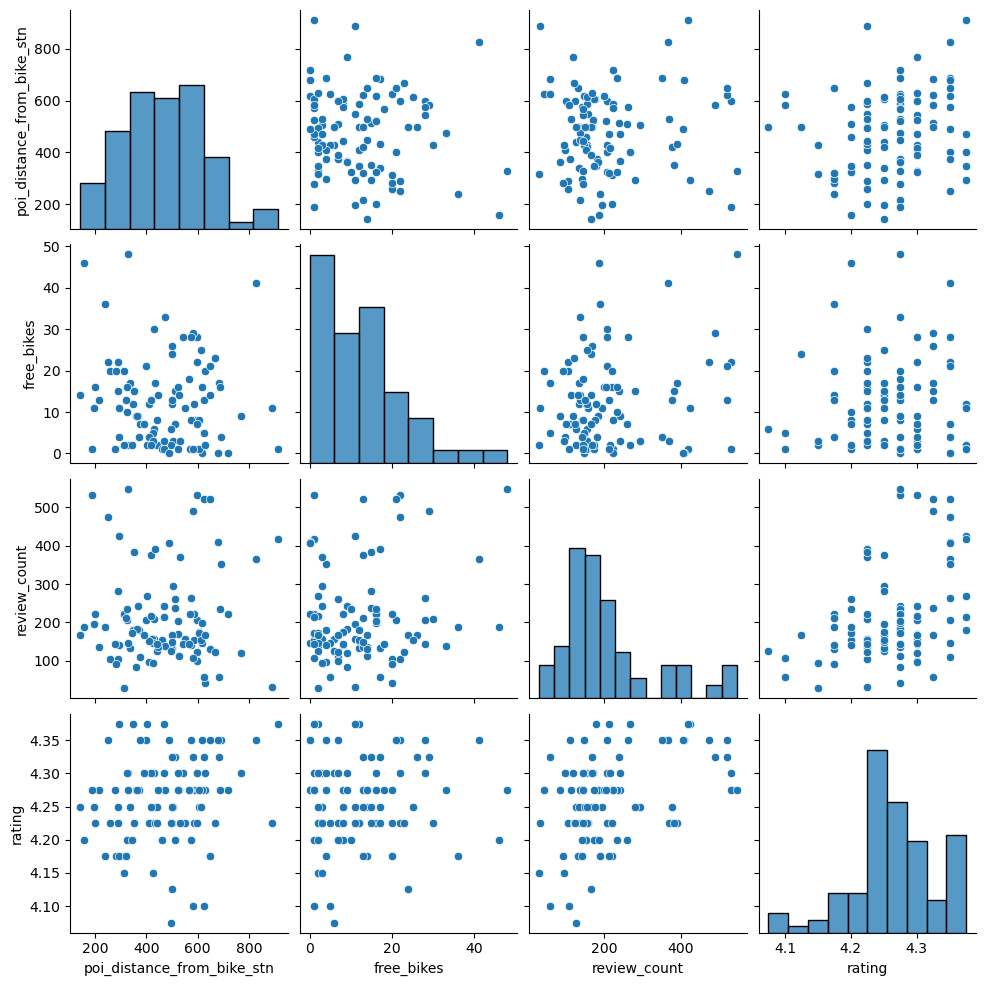

In [112]:
sns.pairplot(df_agg)
plt.show()

#there is no consistent relationship evident from scatter plots except between number of food outlet reviews and 
#average ratings of food outlets.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [78]:
import sqlite3 as sqlite

import pandas as pd

from sqlalchemy import create_engine

In [79]:
engine = create_engine('sqlite:///bike_stns_poi.db')
sqlite_connection = engine.connect()

In [80]:
sqlite_table = "london_city_bikes_stns"
df_bike_stns.to_sql(sqlite_table, sqlite_connection, if_exists='replace')

#create a table of bike stations in london city.

796

In [82]:
sqlite_table = "bike_stns_poi_details"
df_join.to_sql(sqlite_table, sqlite_connection, if_exists='replace')

#create a table of food outlets close to bike stations along with their reviews, ratings and their average
#distance from the bike stations.

2533

In [85]:
sqlite_table = "aggregated_stns_details"
df_agg.to_sql(sqlite_table, sqlite_connection, if_exists='replace')

#create a table with mean aggregations of reviews, ratings and distances for each bike station.

100

Look at the data before and after the join to validate your data.

In [84]:
sql_query = "select count(*) from bike_stns_poi_details"
engine.execute(sql_query).fetchall()

[(2533,)]

In [86]:
sql_query = "select count(*) from aggregated_stns_details"
engine.execute(sql_query).fetchall()

[(100,)]